In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Load the dataset
data = pd.read_csv('../data/sinai_synthetic_data.csv')

# Multiply the entire dataset by one to convert the bool to int
data = data * 1

data.to_csv('../results/csv/LogisticRegression_results.csv', index=False)

# Display information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2177 non-null   float64
 1   comorbidity                       2177 non-null   int64  
 2   sumComorbidities                  2177 non-null   float64
 3   sum_contact_attempts_calc         2177 non-null   float64
 4   day_readmit                       2177 non-null   float64
 5   total_time_spent                  2177 non-null   float64
 6   contact_attempts                  2177 non-null   float64
 7   durationNum                       2177 non-null   float64
 8   new_patient_1                     2177 non-null   int32  
 9   new_patient_2                     2177 non-null   int32  
 10  new_patient_3                     2177 non-null   int32  
 11  race_black african american       2177 non-null   int32  
 12  race_h

In [3]:
# Grouping the features into different arrays:

Tracking = ['new_patient_1','new_patient_2','new_patient_3']
Contact =['sum_contact_attempts_calc','durationNum','spoke_patient_yes','sumContacts_1 call','sumContacts_2 calls','sumContacts_3 calls','sumContacts_4+','sumContacts_no calls']
Demographics = ['age', 'comorbidity','sumComorbidities','race_black african american','race_hispanic','race_other','language_non english','sex_gender_female','hypertension_yes','diabetes_yes','asthma_x_no','type_sw_referral_ed','type_sw_referral_high risk admit','type_sw_referral_other','health_insurance_na','health_insurance_private','health_insurance_public','health_insurance_uninsured']
Social_Determinant = ['sdoh_pcp_0.0','sdoh_pcp_1.0','sdoh_ins_0.0','sdoh_ins_1.0','sdoh_housing_0.0'
                         ,'sdoh_housing2_0.0','food_security_0.0','food_security_1.0','sdoh_util_0.0'
                         ,'sdoh_util_1.0','sdoh_trans_0.0','sdoh_trans_1.0','sdoh_employ_1.0','sdoh_employ_4.0'
                         ,'sdoh_dv_1.0','hiv_test_interest_1.0','covid_vax_signup_1.0','sdoh_diabetes_1.0','sdoh_asthma1_1.0'
                         ,'sdoh_alc_1.0','sdoh_alc_3.0','sdoh_alc_na','sdoh_substance_1.0','sdoh_substance_2.0','sdoh_emotional_1.0'
                         ,'sdoh_emotional_2.0','sdoh_emotional_na','healthedneeds_0.0','healthedneeds_1.0','sdoh_yesno_0.0','sdoh_yesno_1.0'
                         ,'any_unmet_needs_0.0','any_unmet_needs_1.0','referrals_yesno_0.0','referrals_yesno_1.0']
Followup=['total_time_spent','contact_attempts','month_followup_0.0','month_followup_1.0']

In [4]:
# Filter out 4 patients
data = data[data['day_readmit'] != 2.0]
    
data.head()

,age,comorbidity,sumComorbidities,sum_contact_attempts_calc,day_readmit,total_time_spent,contact_attempts,durationNum,new_patient_1,new_patient_2,...,healthedneeds_0.0,healthedneeds_1.0,sdoh_yesno_0.0,sdoh_yesno_1.0,any_unmet_needs_0.0,any_unmet_needs_1.0,referrals_yesno_0.0,referrals_yesno_1.0,month_followup_0.0,month_followup_1.0
0,66.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50.0,0,0.0,0.0,1.0,26.0,3.0,11.0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,61.0,1,1.0,0.0,0.0,65.0,4.0,193.0,0,1,...,1,0,0,1,1,0,1,0,0,1
3,59.0,0,0.0,0.0,0.0,5.0,4.0,11.0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,73.0,0,0.0,0.0,0.0,26.0,3.0,11.0,1,0,...,1,0,0,1,1,0,0,1,1,0


In [5]:
# Define the target variable and features
y = data['day_readmit']
X = data.drop('day_readmit', axis=1)


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)


In [7]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)


LogisticRegression(random_state=1, solver='liblinear')

In [8]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8159509202453987


The model achieves about 81.6% accuracy, indicating that it correctly predicts the outcome for about 81.6% of the cases in the test set.


In [9]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Normalized):\n", conf_matrix)


Confusion Matrix (Normalized):
 [[488  19]
 [101  44]]


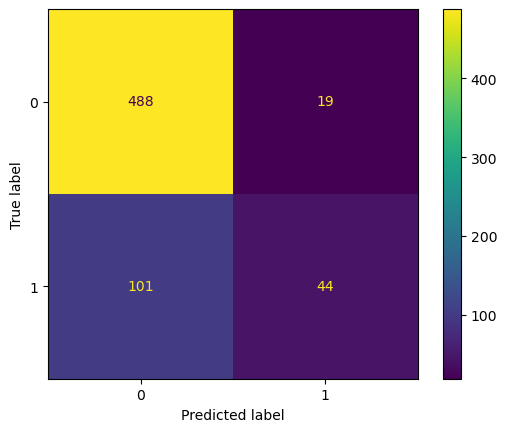

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

True Positives (TP) for non-readmissions are about 96.3%, showing high accuracy for this class.
False Negatives (FN) for readmissions are high at about 69.7%, indicating the model often fails to identify actual readmissions.

In [11]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       507
         1.0       0.70      0.30      0.42       145

    accuracy                           0.82       652
   macro avg       0.76      0.63      0.66       652
weighted avg       0.80      0.82      0.79       652



Precision: For non-readmissions is high at 83%, but lower for readmissions at 70%.
Recall: For readmissions is quite low at 30%, indicating many readmissions are missed.
F1-Score: Reflects the balance between precision and recall, highlighting the model's struggle with the readmission class.

In [12]:
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.30
Specificity: 0.96


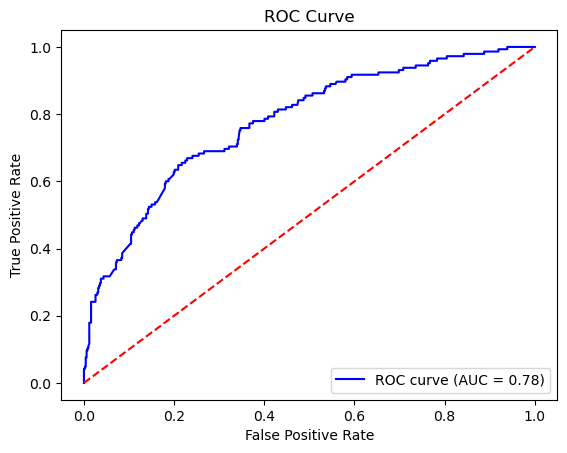

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Initialize the RandomForestClassifier
model_cv = (LogisticRegression(solver='liblinear', class_weight='balanced', random_state=1))

# Setup the cross-validation configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model_cv, X, y, cv=cv, scoring='accuracy')  


print("Accuracy:", np.mean(scores))

Accuracy: 0.7096064410191217


When using cross-validation with balanced class weights, the model's average accuracy drops to about 70.96%. 

In [15]:
# Get predictions from cross-validation
y_pred = cross_val_predict(model_cv, X, y, cv=cv, method = 'predict')

# Generate and display classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
conf_matrix_cv = confusion_matrix(y, y_pred)
print("Confusion Matrix (Normalized) for CV Model:\n", conf_matrix_cv)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.73      0.79      1645
         1.0       0.44      0.66      0.53       528

    accuracy                           0.71      2173
   macro avg       0.65      0.69      0.66      2173
weighted avg       0.76      0.71      0.73      2173

Confusion Matrix (Normalized) for CV Model:
 [[1193  452]
 [ 179  349]]


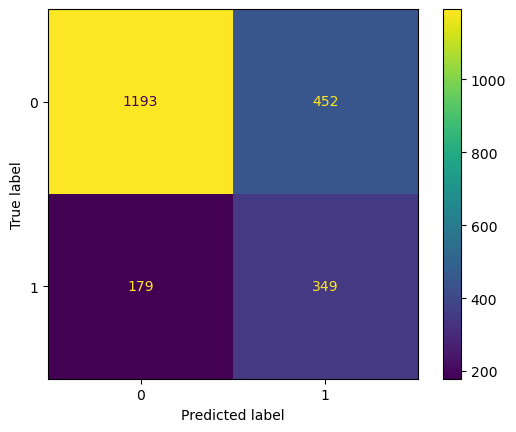

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cv)
disp.plot()
plt.show()

In [17]:
tn, fp, fn, tp = conf_matrix_cv.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.66
Specificity: 0.73


ROC AUC: 0.64


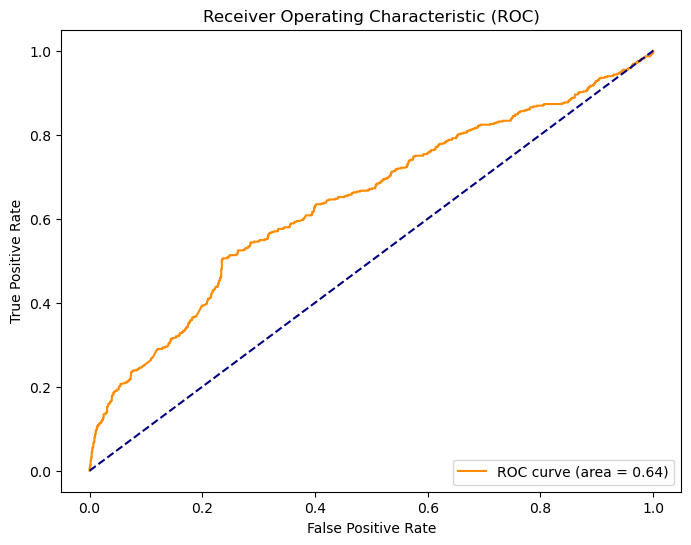

In [18]:
# Get probability estimates
y_probas = cross_val_predict(model_cv, X, y, cv=5, method='predict_proba')

# Extract probabilities for the positive class
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)
print("ROC AUC: {:.2f}".format(roc_auc))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In the cross-validated model, class 0 has a higher precision (0.86 vs. 0.83) and lower recall (0.71 vs. 0.96) compared to the non-cross-validated model.
In the cross-validated model, class 1 has a lower precision (0.43 vs. 0.70) and higher recall (0.64 vs. 0.30) compared to the non-cross-validated model.
The cross-validated model has a lower overall accuracy (0.69 vs. 0.82) compared to the non-cross-validated model.
The F1-scores for both classes are generally lower in the cross-validated model compared to the non-cross-validated model.

In [19]:
columns_to_drop = Tracking + Contact + Social_Determinant + Followup

demographics_df = data.drop(columns=columns_to_drop)

In [20]:
demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2176
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2173 non-null   float64
 1   comorbidity                       2173 non-null   int64  
 2   sumComorbidities                  2173 non-null   float64
 3   day_readmit                       2173 non-null   float64
 4   race_black african american       2173 non-null   int32  
 5   race_hispanic                     2173 non-null   int32  
 6   race_other                        2173 non-null   int32  
 7   language_non english              2173 non-null   int32  
 8   sex_gender_female                 2173 non-null   int32  
 9   hypertension_yes                  2173 non-null   int32  
 10  diabetes_yes                      2173 non-null   int32  
 11  asthma_x_no                       2173 non-null   int32  
 12  engaged_yes

In [21]:
# split dataset into train and test
y=demographics_df['day_readmit']
X=demographics_df.drop('day_readmit',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.3)

#train the model
demo_model = (LogisticRegression(solver='liblinear', class_weight='balanced', random_state=1))

# Setup the cross-validation configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(demo_model, X, y, cv=cv, scoring='accuracy')  

print("Accuracy:", np.mean(scores))

Accuracy: 0.6713967900842206


In [22]:
# Get predictions from cross-validation
y_pred = cross_val_predict(demo_model, X, y, cv=cv, method = 'predict')

# Generate and display classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
demo_cm = confusion_matrix(y, y_pred)
print("Confusion Matrix (Normalized) for CV Model:\n", demo_cm)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.67      0.75      1645
         1.0       0.40      0.69      0.50       528

    accuracy                           0.67      2173
   macro avg       0.63      0.68      0.63      2173
weighted avg       0.75      0.67      0.69      2173

Confusion Matrix (Normalized) for CV Model:
 [[1097  548]
 [ 166  362]]


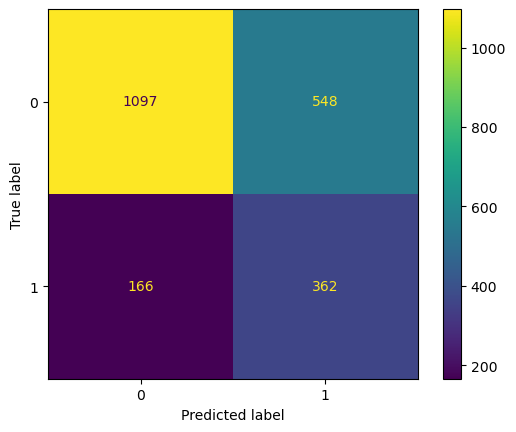

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=demo_cm)
disp.plot()
plt.show()

Class Imbalance: The model is biased towards predicting non-readmissions much more accurately than readmissions. This is likely due to a class imbalance where non-readmissions are much more prevalent or easier to predict based on the given features.

Low Recall for Readmissions: The extremely low recall for readmissions is a concern, especially if the objective is to identify as many true readmissions as possible to prevent them. This suggests the model is practically useless for its intended purpose if that purpose involves flagging readmissions.

In [24]:
tn, fp, fn, tp = demo_cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.69
Specificity: 0.67


ROC AUC: 0.66


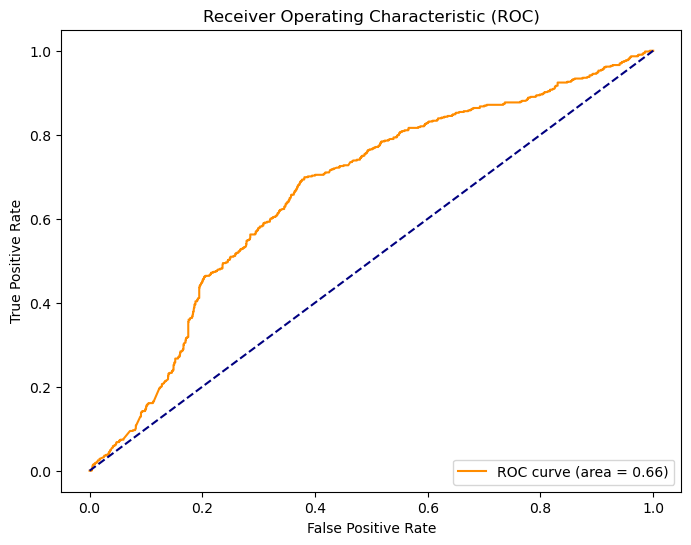

In [25]:
# Get probability estimates
y_probas = cross_val_predict(demo_model, X, y, cv=5, method='predict_proba')

# Extract probabilities for the positive class
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)
print("ROC AUC: {:.2f}".format(roc_auc))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [26]:
columns_to_drop = Tracking + Social_Determinant + Followup

demo_CHW_df = data.drop(columns=columns_to_drop)

In [27]:
demo_CHW_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2176
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2173 non-null   float64
 1   comorbidity                       2173 non-null   int64  
 2   sumComorbidities                  2173 non-null   float64
 3   sum_contact_attempts_calc         2173 non-null   float64
 4   day_readmit                       2173 non-null   float64
 5   durationNum                       2173 non-null   float64
 6   race_black african american       2173 non-null   int32  
 7   race_hispanic                     2173 non-null   int32  
 8   race_other                        2173 non-null   int32  
 9   language_non english              2173 non-null   int32  
 10  sex_gender_female                 2173 non-null   int32  
 11  hypertension_yes                  2173 non-null   int32  
 12  diabetes_ye

In [28]:
# split dataset into train and test
y=demo_CHW_df['day_readmit']
X=demo_CHW_df.drop('day_readmit',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.3)

#train the model
demo_CHW_model = (LogisticRegression(solver='liblinear', class_weight='balanced', random_state=1))

# Setup the cross-validation configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(demo_CHW_model, X, y, cv=cv, scoring='accuracy')  

print("Accuracy:", np.mean(scores))

Accuracy: 0.6842777689496267


In [29]:
# Get predictions from cross-validation
y_pred = cross_val_predict(demo_CHW_model, X, y, cv=cv, method = 'predict')

# Generate and display classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
demo_CHW_cm = confusion_matrix(y, y_pred)
print("Confusion Matrix (Normalized) for CV Model:\n", demo_CHW_cm)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.69      0.77      1645
         1.0       0.41      0.67      0.51       528

    accuracy                           0.68      2173
   macro avg       0.64      0.68      0.64      2173
weighted avg       0.76      0.68      0.70      2173

Confusion Matrix (Normalized) for CV Model:
 [[1133  512]
 [ 174  354]]


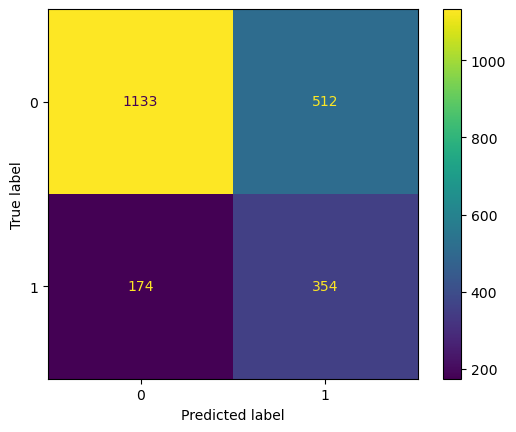

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=demo_CHW_cm)
disp.plot()
plt.show()

Precision:
Class 0.0 (Non-readmission): The precision is 0.77, meaning that when the model predicts non-readmission, it is correct about 77% of the time.
Class 1.0 (Readmission): The precision is 0.53, indicating that when the model predicts readmission, it is correct 53% of the time.
Recall (Sensitivity or True Positive Rate):
Class 0.0: The recall is very high at 0.96, suggesting that the model is highly effective at identifying non-readmissions.
Class 1.0: The recall is very low at 0.13, indicating the model struggles significantly to identify true cases of readmissions.
F1-Score:
Class 0.0: The F1-score is 0.85, reflecting a good balance between precision and recall for non-readmissions.
Class 1.0: The F1-score is quite low at 0.20, showing poor balance between precision and recall for readmissions.



In [31]:
tn, fp, fn, tp = demo_CHW_cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.67
Specificity: 0.69


ROC AUC: 0.67


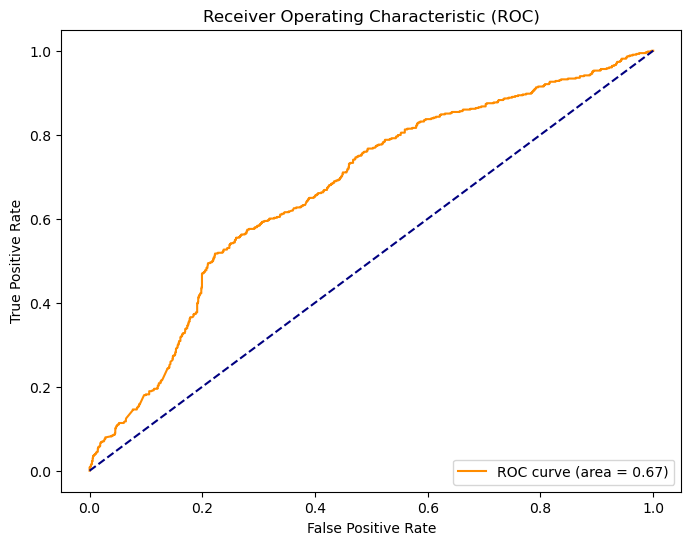

In [32]:
# Get probability estimates
y_probas = cross_val_predict(demo_CHW_model, X, y, cv=5, method='predict_proba')

# Extract probabilities for the positive class
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)
print("ROC AUC: {:.2f}".format(roc_auc))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [33]:
columns_to_drop = Tracking + Contact + Followup

demo_SDOH_df = data.drop(columns=columns_to_drop)

In [34]:
demo_SDOH_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 0 to 2176
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2173 non-null   float64
 1   comorbidity                       2173 non-null   int64  
 2   sumComorbidities                  2173 non-null   float64
 3   day_readmit                       2173 non-null   float64
 4   race_black african american       2173 non-null   int32  
 5   race_hispanic                     2173 non-null   int32  
 6   race_other                        2173 non-null   int32  
 7   language_non english              2173 non-null   int32  
 8   sex_gender_female                 2173 non-null   int32  
 9   hypertension_yes                  2173 non-null   int32  
 10  diabetes_yes                      2173 non-null   int32  
 11  asthma_x_no                       2173 non-null   int32  
 12  engaged_yes

In [35]:
# split dataset into train and test
y=demo_SDOH_df['day_readmit']
X=demo_SDOH_df.drop('day_readmit',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.3)

#train the model
#train the model
demo_SDOH_model = (LogisticRegression(solver='liblinear', class_weight='balanced', random_state=1))

# Setup the cross-validation configuration
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(demo_SDOH_model, X, y, cv=cv, scoring='accuracy')  

print("Accuracy:", np.mean(scores))

Accuracy: 0.6654229567244029


In [36]:
# Get predictions from cross-validation
y_pred = cross_val_predict(demo_SDOH_model, X, y, cv=cv, method = 'predict')

# Generate and display classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
demo_SDOH_cm = confusion_matrix(y, y_pred)
print("Confusion Matrix (Normalized) for CV Model:\n", demo_SDOH_cm)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.67      0.75      1645
         1.0       0.39      0.66      0.49       528

    accuracy                           0.67      2173
   macro avg       0.62      0.66      0.62      2173
weighted avg       0.74      0.67      0.69      2173

Confusion Matrix (Normalized) for CV Model:
 [[1099  546]
 [ 181  347]]


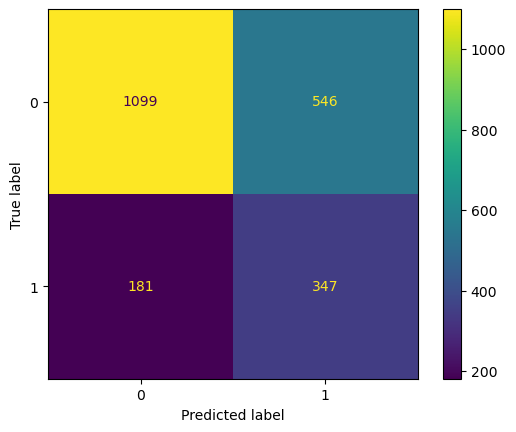

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=demo_SDOH_cm)
disp.plot()
plt.show()

Precision:
Class 0.0 (Non-readmission): Precision is 0.75, which means that 75% of the instances predicted as non-readmissions were indeed non-readmissions.
Class 1.0 (Readmission): Precision is 0.38, indicating that only 38% of the instances predicted as readmissions were actually readmissions. This suggests that many false positives are occurring in this class.
Recall (Sensitivity or True Positive Rate):
Class 0.0: The recall is very high at 0.96, showing that the model is capable of identifying most of the non-readmission cases correctly.
Class 1.0: The recall is quite low at 0.08, indicating that the model fails to identify the majority of actual readmission cases (high false negative rate).
F1-Score:
Class 0.0: The F1-score is 0.84, which is quite strong, indicating a good balance between precision and recall for the non-readmission predictions.
Class 1.0: The F1-score is only 0.13, reflecting the poor performance in both precision and recall for readmission predictions.

In [39]:
tn, fp, fn, tp = demo_SDOH_cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.66
Specificity: 0.67


ROC AUC: 0.61


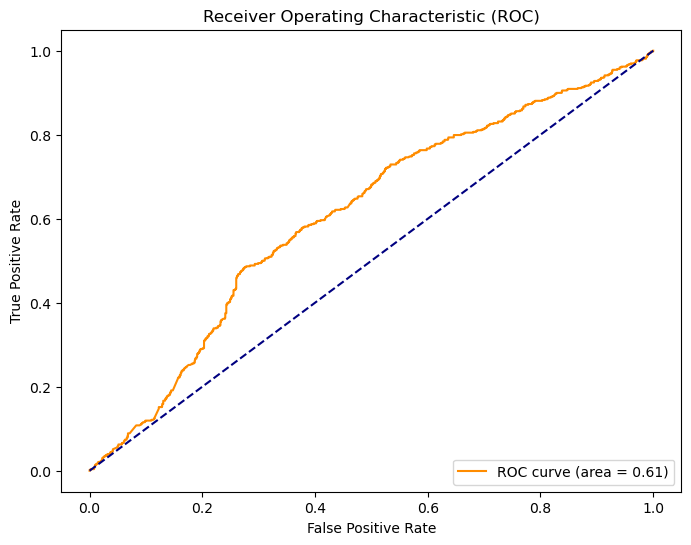

In [38]:
# Get probability estimates
y_probas = cross_val_predict(demo_SDOH_model, X, y, cv=5, method='predict_proba')

# Extract probabilities for the positive class
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)
print("ROC AUC: {:.2f}".format(roc_auc))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()